# Lab 3-1 훈련 세트와 테스트 세트

## 라이브러리 import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# 한글 처리
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

Duplicate key in file WindowsPath('c:/Users/gik_k/anaconda3/Lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 263 ('font.family:  Malgun Gothic')
Duplicate key in file WindowsPath('c:/Users/gik_k/anaconda3/Lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 414 ('axes.unicode_minus: False')


## 데이터 준비

### 데이터 준비

In [3]:
# 0-34 인덱스 까지는 도미, 나머지 14개는 빙어
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

### 테스트 데이터와 타겟 데이터 생성

In [4]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1] * 35 + [0] * 14

### 모델 생성
K-Nearest Neighbor 알고리즘 모델

In [5]:
kn = KNeighborsClassifier()

### 훈련 세트와 테스트 세트 생성

In [6]:
# 훈련 세트: 0에서 34까지
train_input = fish_data[:35]
train_target = fish_target[:35]

# 테스트 세트: 35에서 마지막 인덱스까지
test_input = fish_data[35:]
test_target = fish_target[35:]

### 훈련 (학습)

In [7]:
# 학습
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [8]:
# 평가
kn.score(test_input, test_target)

0.0

## 예측

### 훈련, 테스트 데이터를 DataFrame으로 변환

In [9]:
columns = ['length', 'weight']
df_train_input = pd.DataFrame(train_input, columns=columns)
df_test_input = pd.DataFrame(test_input, columns=columns)

### 도미로 예측되어야 하는 데이터

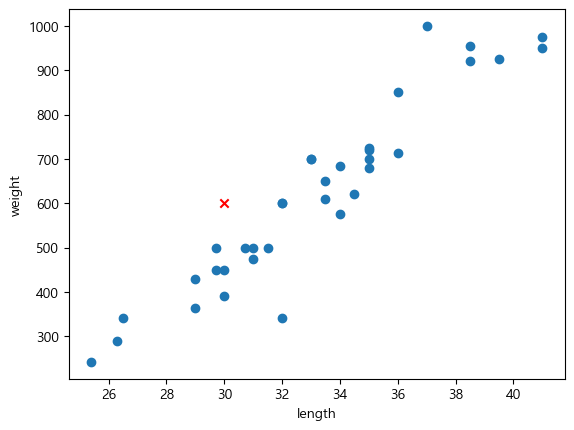

In [20]:
# 이전 예측 데이터
plt.scatter(x=df_train_input.weight, y=df_train_input.length)
plt.scatter(30, 600, marker="x", color="red")
plt.xlabel("length")
plt.ylabel("weight")

plt.show()

In [11]:
# 도미로 예측
kn.predict([[12,120]])

array([1])

### 빙어로 예측되어야 하는 데이터

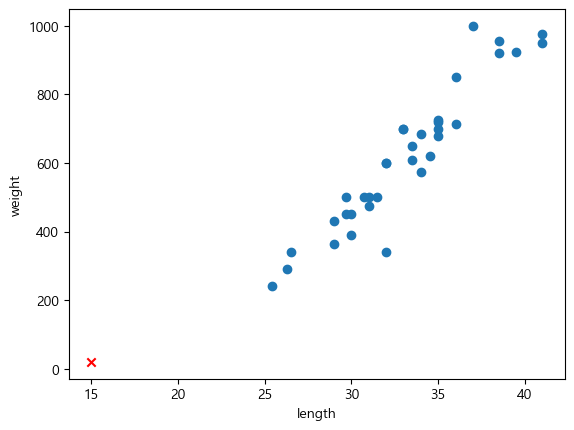

In [22]:
# 빙어로 예측되어야 하는 데이터
plt.scatter(x=df_train_input.weight, y=df_train_input.length)
plt.scatter(15, 19.9, marker="x", color="red")
plt.xlabel("length")
plt.ylabel("weight")

plt.show()

In [13]:
# 도미로 예측
kn.predict([[15,19.9]])

array([1])

## 데이터 확인

In [16]:
columns = ['weight', 'length']
df_train_input = pd.DataFrame(train_input, columns=columns)
df_test_input = pd.DataFrame(test_input, columns=columns)

{'whiskers': [<matplotlib.lines.Line2D at 0x17e24e75b50>,
 'caps': [<matplotlib.lines.Line2D at 0x17e24d1a690>,
 'boxes': [<matplotlib.lines.Line2D at 0x17e24e758b0>,
 'medians': [<matplotlib.lines.Line2D at 0x17e24e76510>,
 'fliers': [<matplotlib.lines.Line2D at 0x17e24e76750>,
 'means': []}

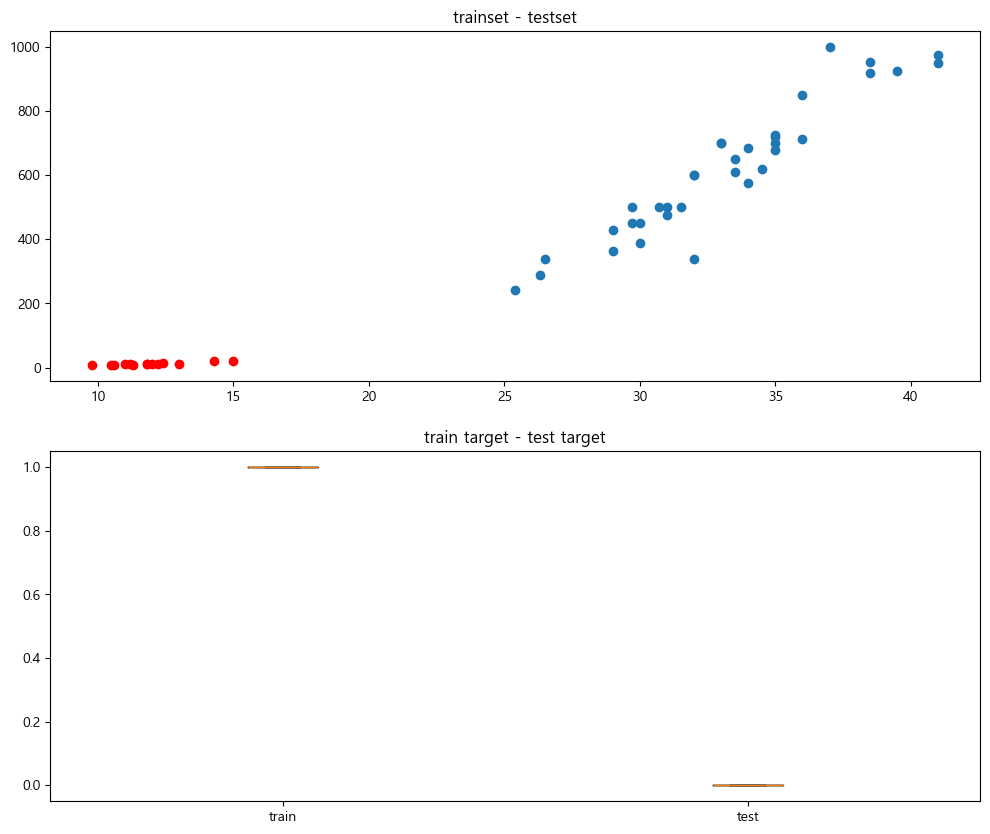

In [18]:
fig = plt.figure(figsize=(12,10))

# add_subplot(행수, 열수, 인덱스)
ax1 = fig.add_subplot(2,1,1)
ax1.set_title('trainset - testset')
ax2 = fig.add_subplot(2,1,2)
ax2.set_title('train target - test target')

ax1.scatter(x=df_train_input.weight, y=df_train_input.length)
ax1.scatter(x=df_test_input.weight, y=df_test_input.length, color='red')
ax2.boxplot(x=[train_target, test_target], tick_labels=['train','test'])